# InsightVio: Explainable AI for Breast Cancer Prediction
**Author**: Nikul Ram  
**Version**: August 2025  
**Purpose**: Demonstrate local feature attribution using SHAP and LIME on a RandomForest model trained on the Breast Cancer dataset.


In [2]:

# Add project root to sys.path so insightvio modules can be found
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(".."))  # one level up from /notebooks
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

# Load core InsightVio modules
from insightvio.data_loader import load_breast_cancer_data
from insightvio.model_trainer import train_random_forest
from insightvio.explainer import InsightExplainer
from insightvio.visualizer import InsightVisualizer


c:\Users\Nikul\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the breast cancer dataset
X_train, X_test, y_train, y_test, feature_names = load_breast_cancer_data()
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (455, 30)
Test set shape: (114, 30)


In [4]:
# Train a Random Forest model
model = train_random_forest(X_train, y_train)


In [5]:
# Initialize explainer and visualizer
explainer = InsightExplainer(model, X_train, feature_names)
visualizer = InsightVisualizer()


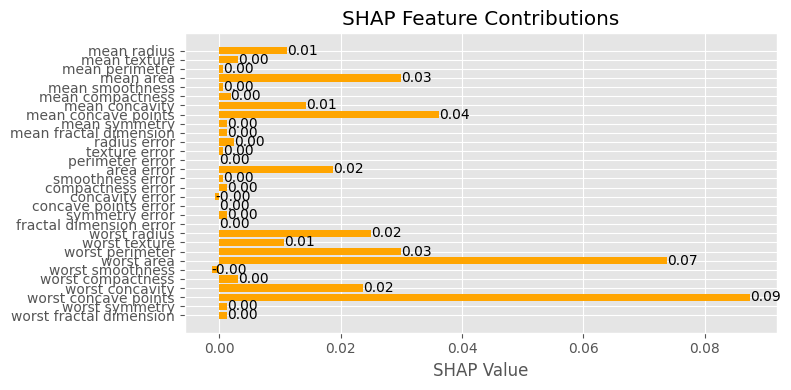

In [6]:
# Select one instance
instance = X_test[0].reshape(1, -1)

# Run SHAP explanation
shap_values, base_value = explainer.explain_with_shap(instance)

# Visualize SHAP results
visualizer.plot_shap_explanation(shap_values, feature_names, X_test[0])


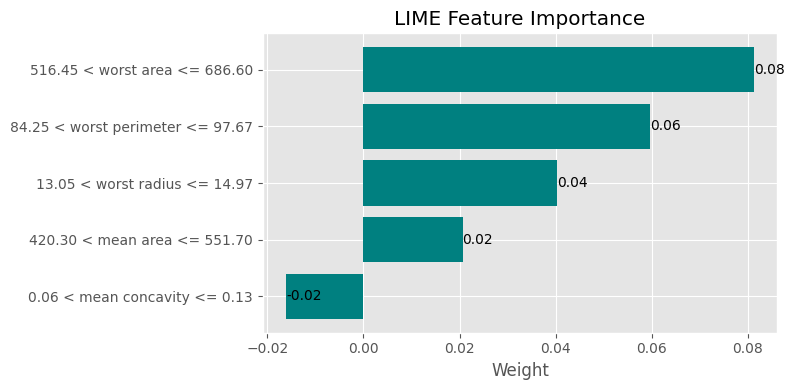

In [7]:
# Run LIME explanation
lime_explanation = explainer.explain_with_lime(X_test[0])

# Visualize LIME results
visualizer.plot_lime_explanation(lime_explanation)


## Summary

- InsightVio provided consistent explanations using both SHAP and LIME
- The model is interpretable and visually explainable
- This workflow is now reusable across other domains and datasets (via CLI or notebook)
- Future work: integrate this into Streamlit or Flask app for clinical/research use
